In [70]:
import numpy
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import statsmodels.api as sm
import pandas
from scipy.io import loadmat

def summarize(name, x, y, bins):
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()
    
    mean = numpy.average(y)
    std = numpy.std(y)
    # print(mean, std)
    fig, ax = plt.subplots()
    ax.set_title(f'{name} - Data, Mean, Std')
    plot_sampled, = ax.plot(x, y, 'b', label="sampled")
    plot_mean, = ax.plot([x_min, x_max], [mean, mean], 'r', label="Mean")
    plot_std, = ax.plot([x_min, x_max], [std, std], 'g', label="Standard Diviation")
    ax.legend()
    
    fig, ax = plt.subplots()
    ax.set_title(f'{name} - Histrogram')
    ax.hist(y, bins=bins)
    #ax.legend()

    density = gaussian_kde(y)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    xs = numpy.linspace(y_min, y_max, 200)
    fig, ax = plt.subplots()
    ax.set_title(f'{name} - Density Plot')
    ax.plot(xs, density(xs))
    
    fig, ax = plt.subplots()
    ax.set_title(f'{name} - Box Plot')
    ax.boxplot(y)

    fig, ax = plt.subplots()
    ax.set_title(f'{name} - LAG 1 Plot')
    ax.set_xlabel('y')
    ax.set_ylabel('y-1')
    ax.plot(y[:-1], y[1:], 'x')

    # fig, ax = plt.subplots()
    # ax.set_title(f'{name} - Autocorrelation Plot')
    # ax.acorr(y, normed=True, maxlags=40, lw=2)

    fig, ax = plt.subplots()
    sm.graphics.tsa.plot_acf(y, lags=40, ax=ax)
    ax.set_title(f'{name} - Autocorrelation Plot')

    fig, ax = plt.subplots()
    sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax, method='ywm')
    ax.set_title(f'{name} - Partial Autocorrelation Plot')

    print('Ljung Box\n', sm.stats.acorr_ljungbox(y, lags=[5], return_df=True))
    print('ADF\n', sm.tsa.adfuller(y, maxlag=40))

Ljung Box
    lb_stat  lb_pvalue
5   1.3737   0.927168
ADF
 (-71.1667132376083, 0.0, 0, 4999, {'1%': -3.431658793968827, '5%': -2.862118345383404, '10%': -2.567077853953267}, 14088.072083421033)
Ljung Box
     lb_stat  lb_pvalue
5  5.127214   0.400553
ADF
 (-3.6077101516531056, 0.005615325505060199, 8, 91, {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}, -248.44457237920653)


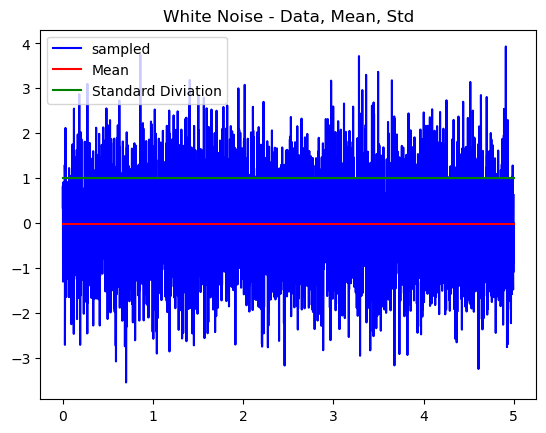

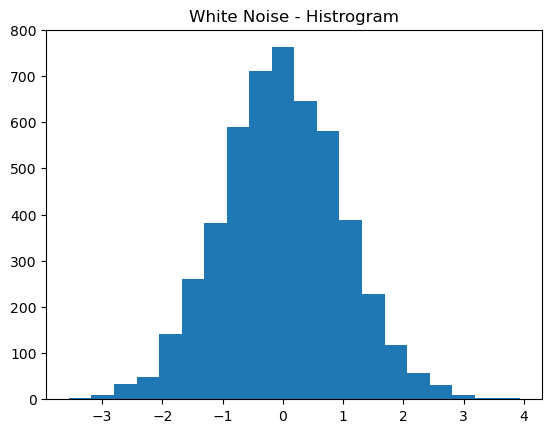

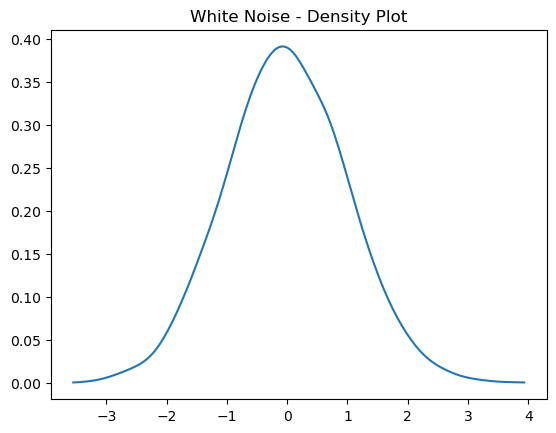

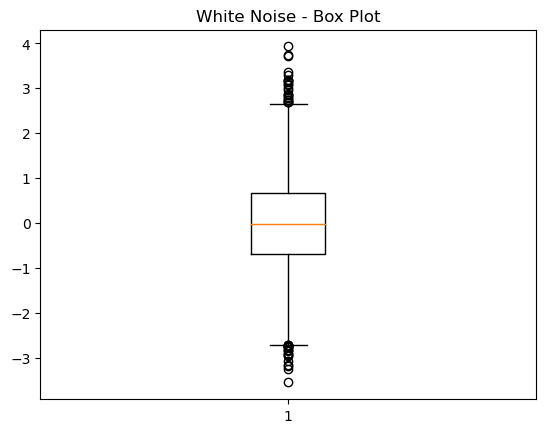

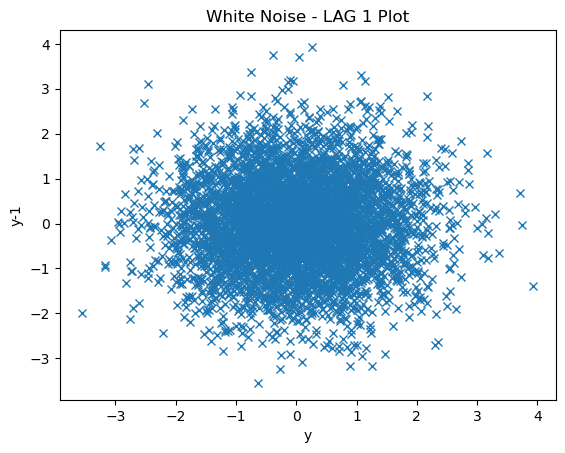

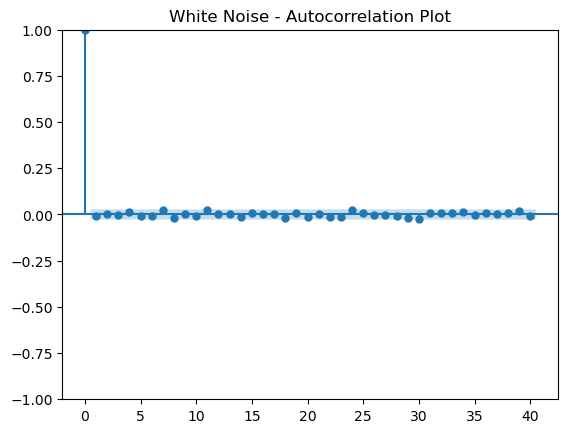

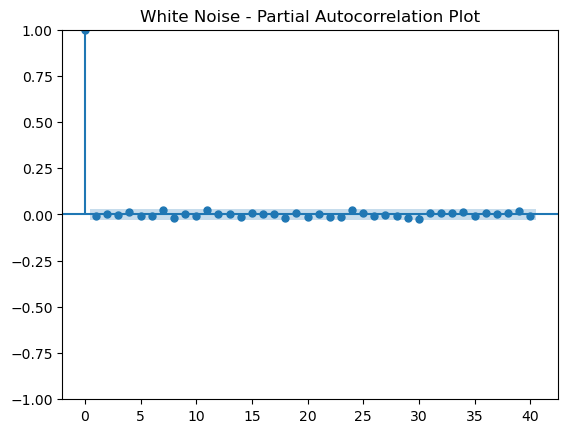

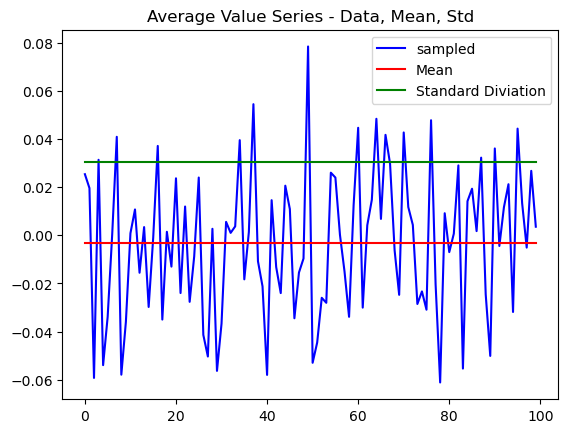

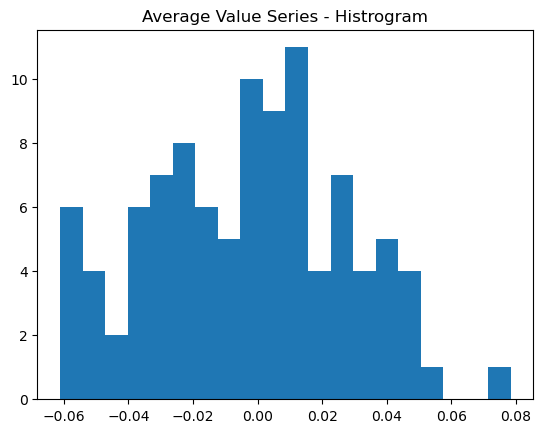

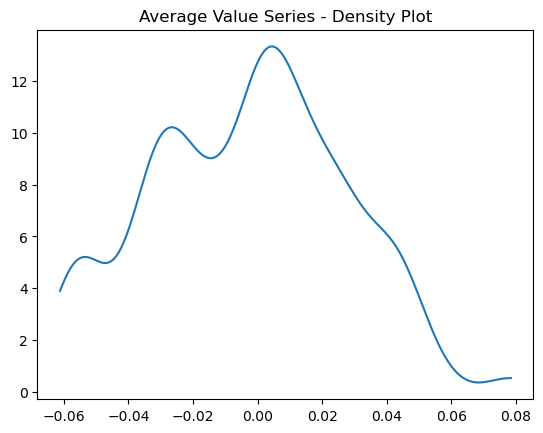

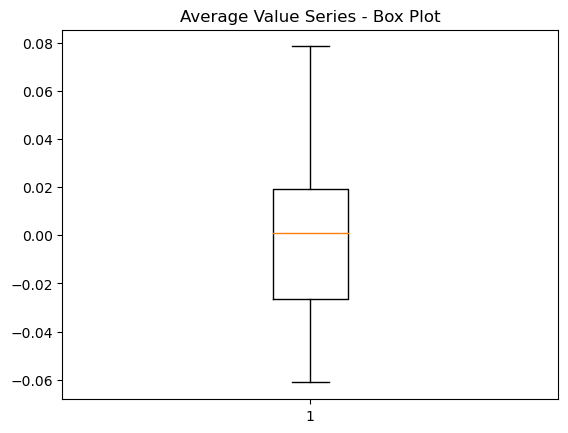

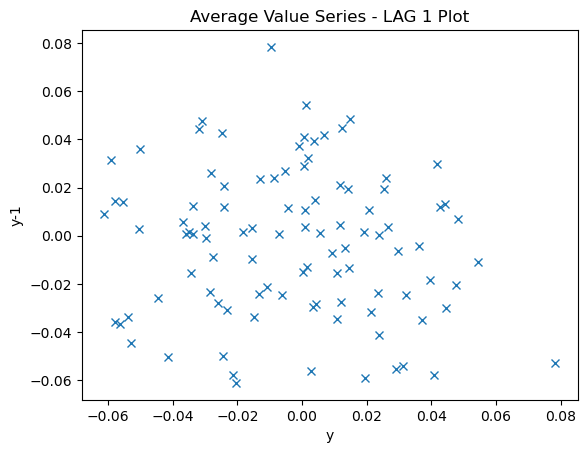

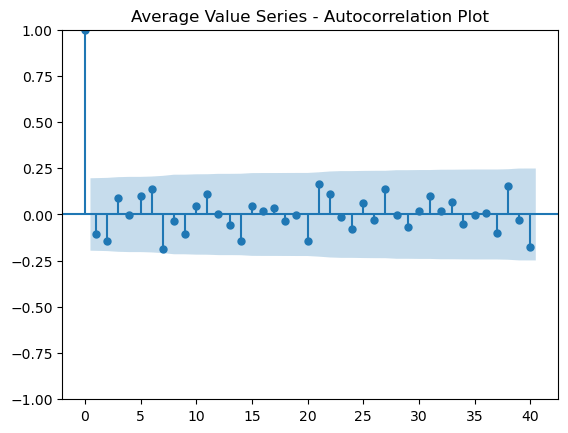

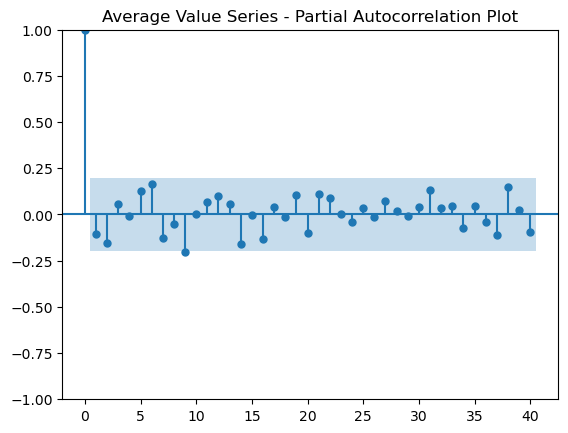

In [2]:
seed = 1
rng = numpy.random.default_rng(seed)
c = 1 # Noise Strength
samples = 1000
test_size = 0.20

x = numpy.arange(0, 5, 1/samples)
#print(x)
# x.sort()
# y_ground_truth = numpy.sin(x * 2 * numpy.pi)
y_ground_truth = numpy.zeros(x.shape)
y = y_ground_truth + c * rng.normal(0, 1, x.shape)

summarize("White Noise", x, y, 20)

# Generating Average valeu series. Not 100% sure if this is what they mean
x = range(0,100)
y = []
for i in x:
    data = c * rng.normal(0, 1, 1000)
    y.append(numpy.average(data))
summarize("Average Value Series", numpy.array(x), numpy.array(y), 20)

Ljung Box
        lb_stat  lb_pvalue
5  4811.337757        0.0
ADF
 (-1.621706512744499, 0.4718347521637697, 2, 997, {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}, 2722.014379700023)


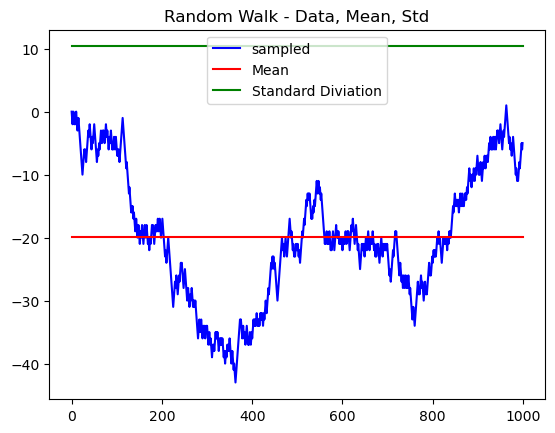

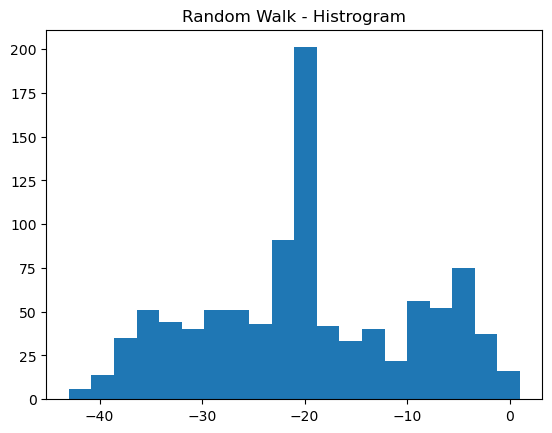

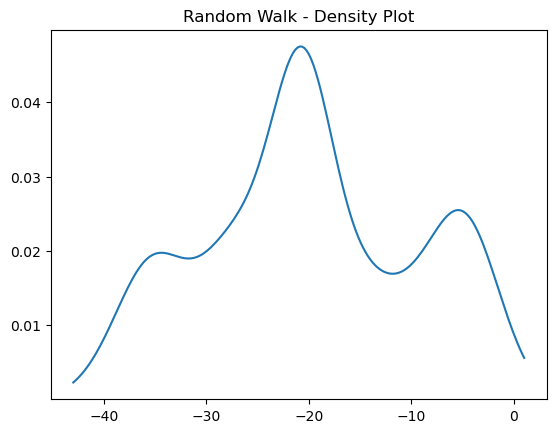

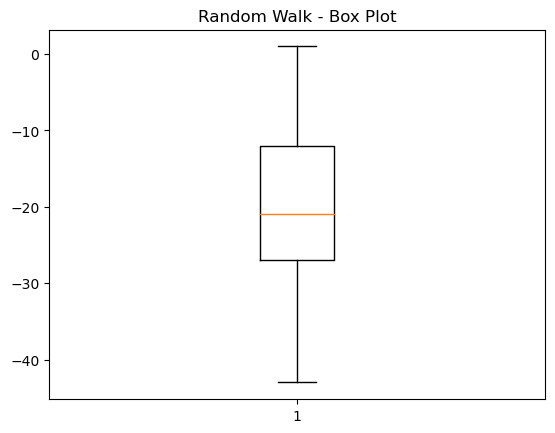

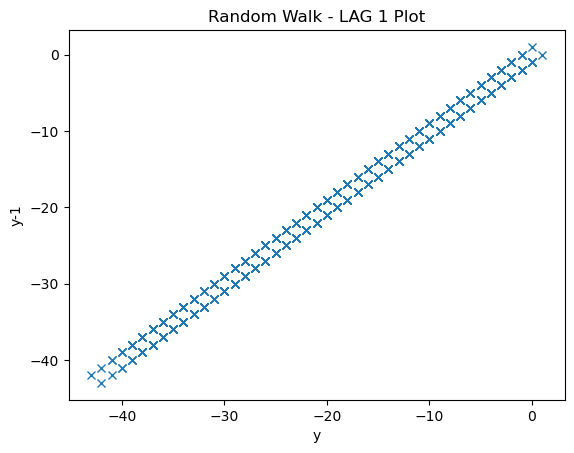

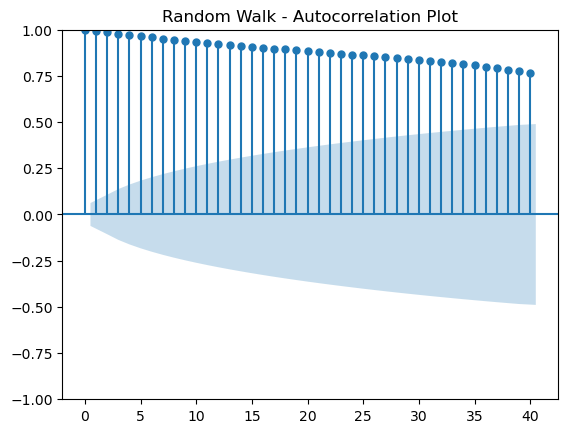

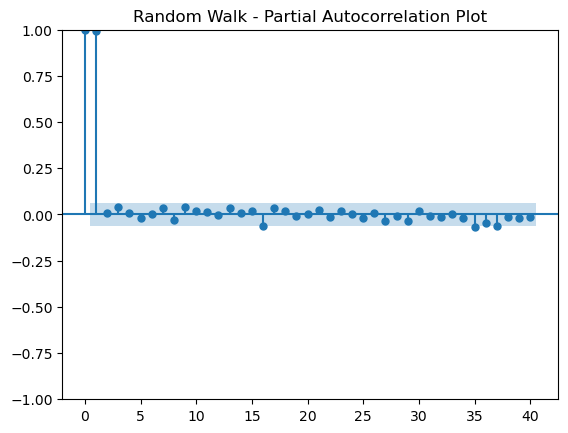

In [3]:
# 3.1.2 Random Walk
N = 1000
x = numpy.arange(0,N)
y = numpy.zeros(x.shape)
for i in x[1:]:
    y[i] = y[i-1] + numpy.random.choice([1,-1])
summarize("Random Walk", x, y, 20)

Ljung Box
       lb_stat      lb_pvalue
5  505.753172  4.575034e-107
ADF
 (2.4444928618153443, 0.9990297334555837, 9, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, -57.24374931278717)
First Order
Ljung Box
      lb_stat     lb_pvalue
5  37.229219  5.388000e-07
ADF
 (-12.165503286659835, 1.4604869372131342e-22, 2, 137, {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603}, -59.362890224350366)
Seasonal Decomposition
STL


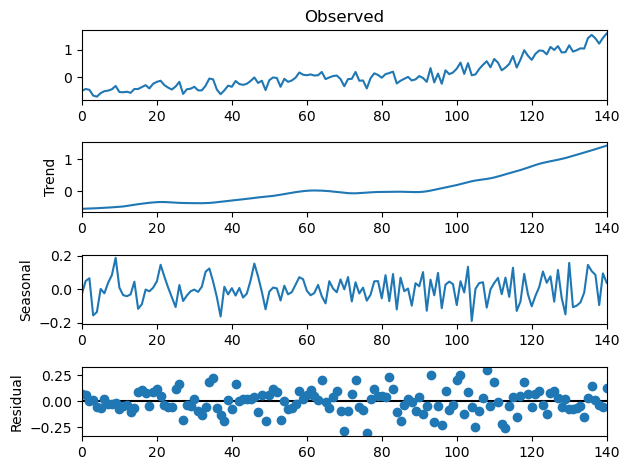

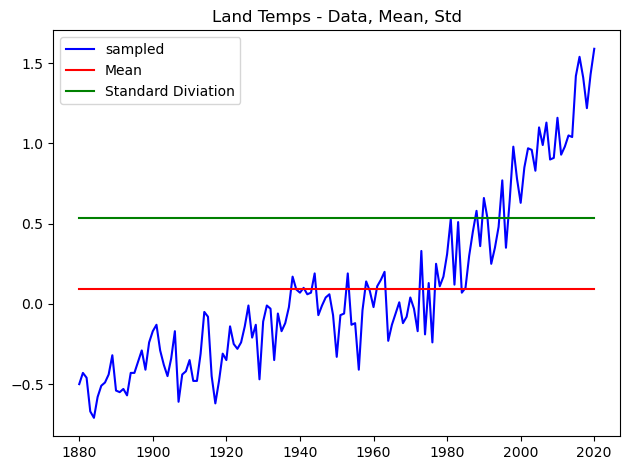

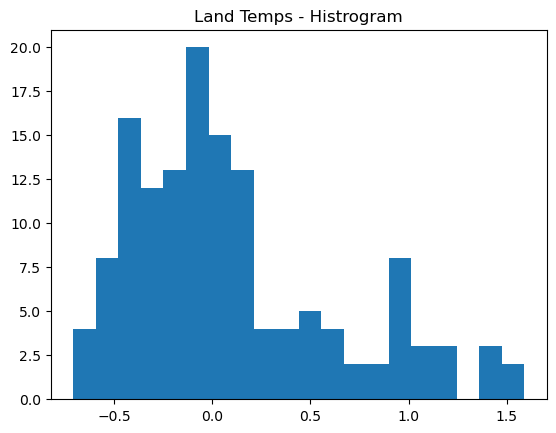

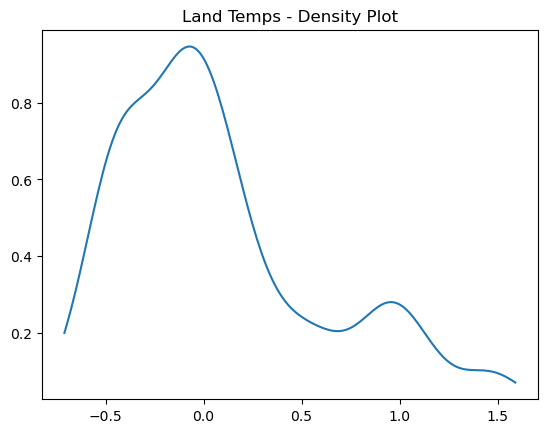

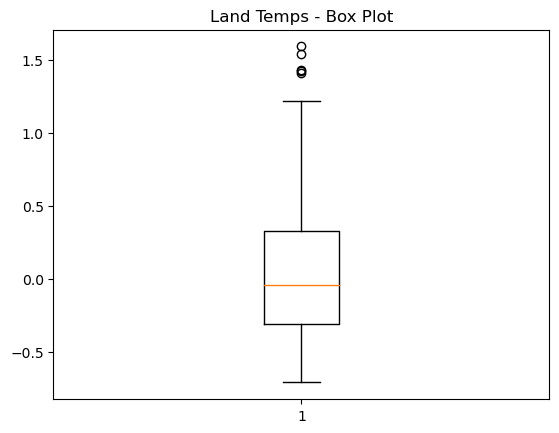

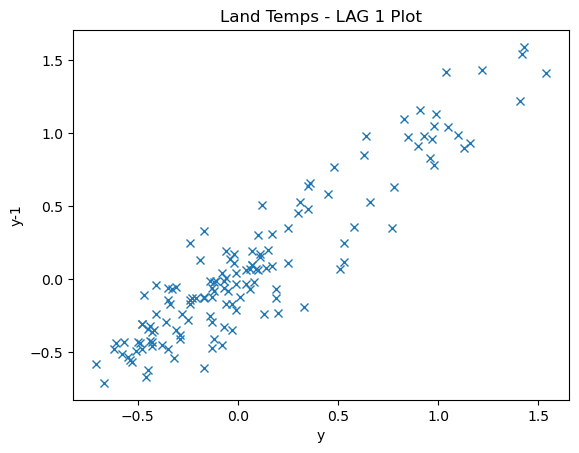

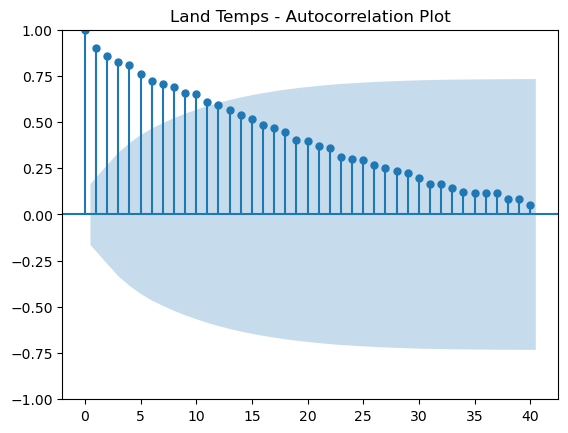

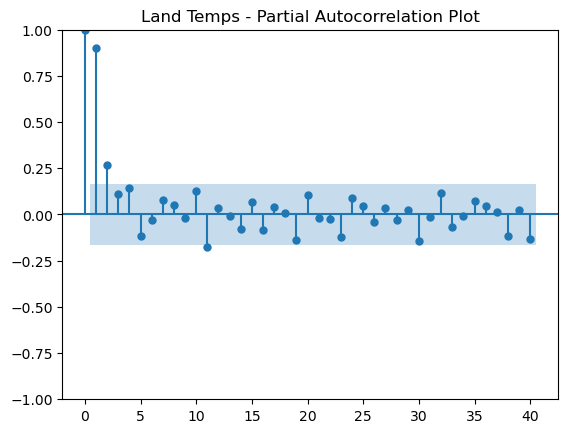

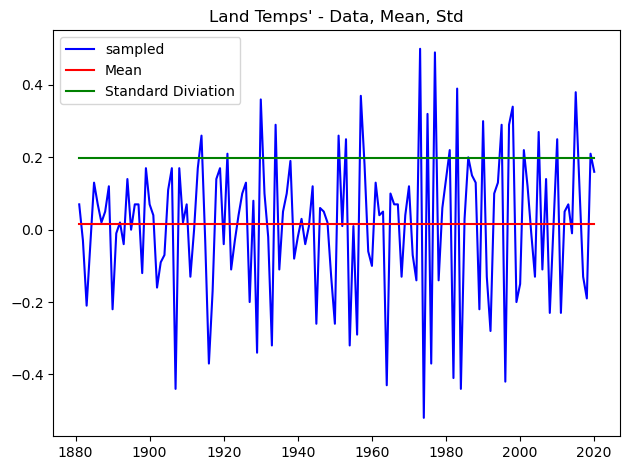

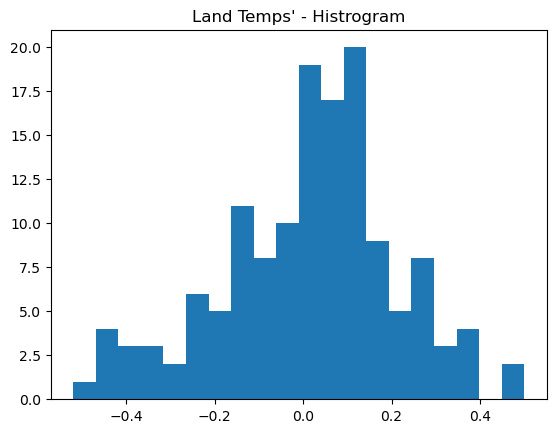

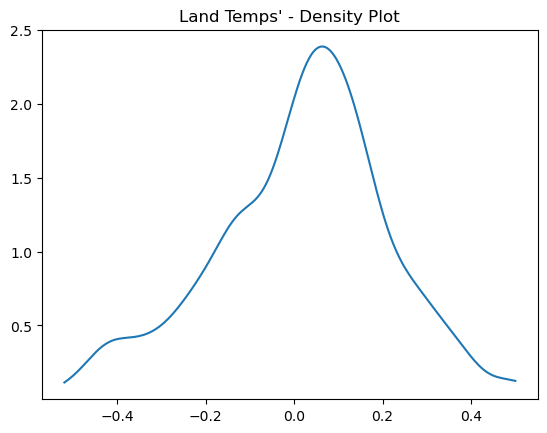

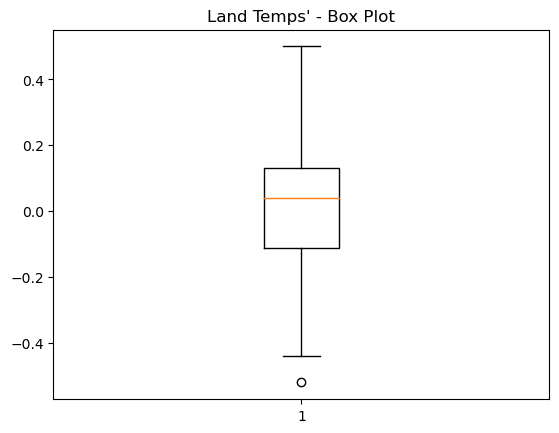

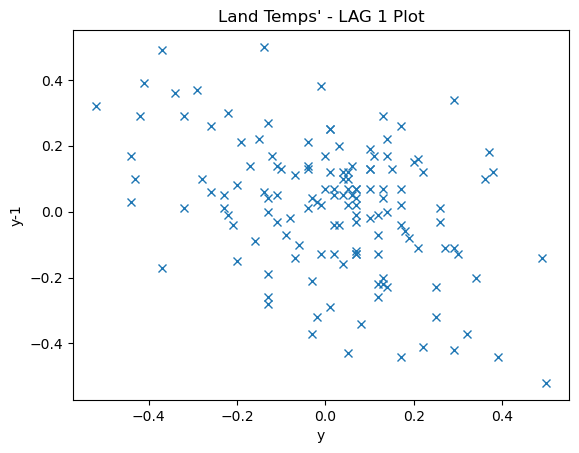

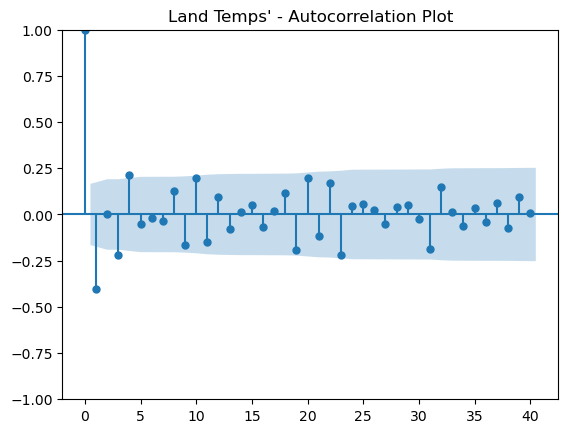

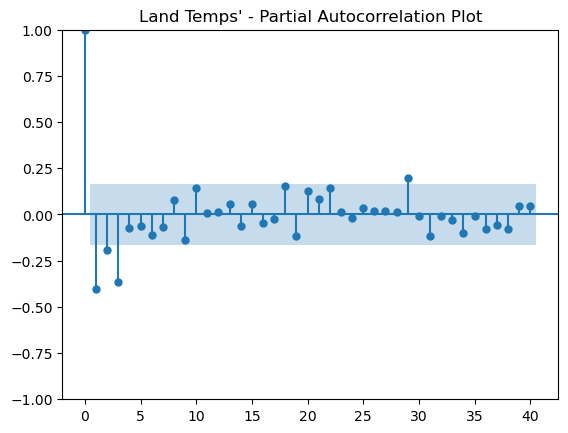

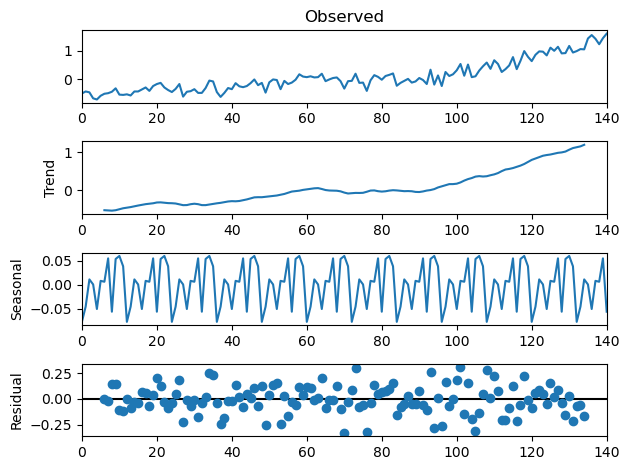

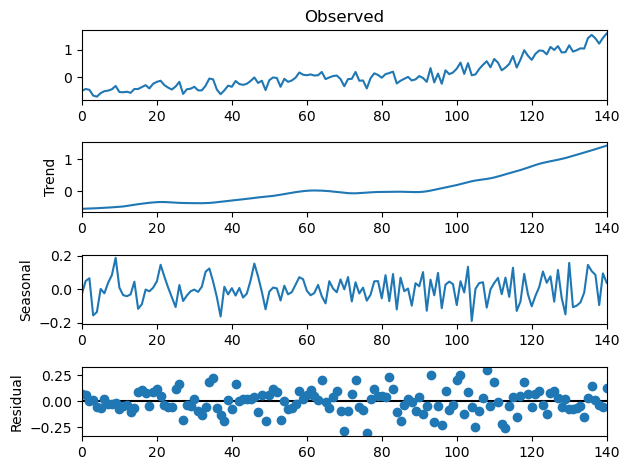

In [57]:
# 3.1.3 Global temp
filename='./statistic_id1048518_global-land-temperature-anomalies-1880-2020.xlsx'
data = pandas.read_excel(io=filename, sheet_name="Data", usecols=[1,2], header=None, skiprows=range(0,5))
n_data = data.to_numpy()
x = n_data[:,0]
y = n_data[:,1]
summarize("Land Temps", x, y, 20)

print("First Order")
x2 = x[1:]
y2 = y[1:] - y[:-1]
summarize("Land Temps'", x2, y2, 20)

print("Seasonal Decomposition")
res = sm.tsa.seasonal_decompose(y, model="additive", period=12)
res.plot()

print("STL")
res = sm.tsa.STL(y, period=12).fit()
res.plot()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


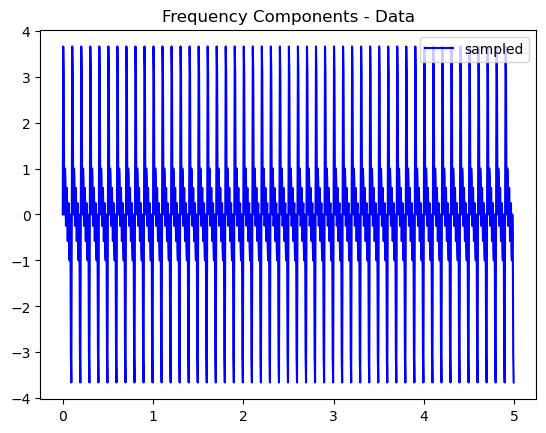

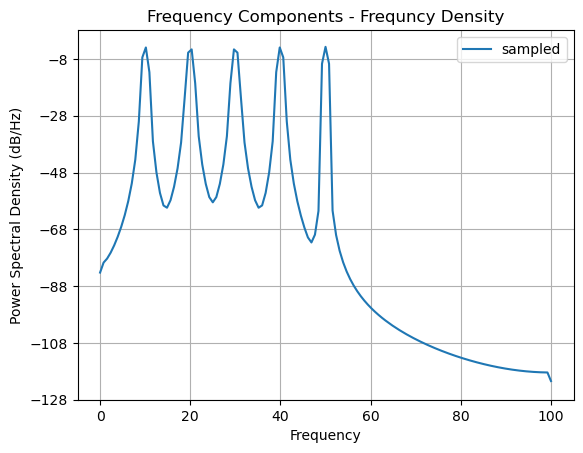

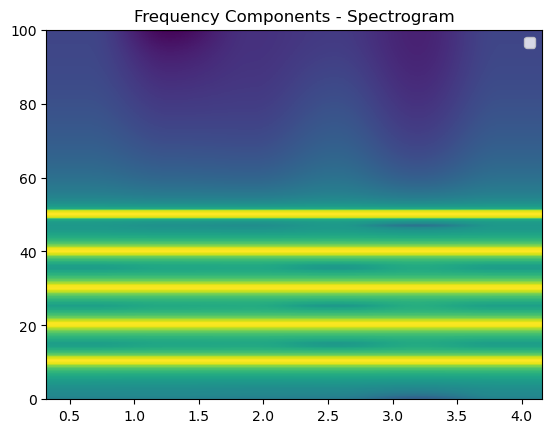

In [69]:
# 3.2.1 Frequency Components
n = 5
freq = 10
duration = 5 #sec
sample_rate = 200 # Hz
x = numpy.arange(0, duration, 1/sample_rate)
y = numpy.zeros(x.shape)
for i in range(1,n + 1):
    y = y + numpy.sin(2 * numpy.pi * i * freq * x)

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Data')
plot_sampled, = ax.plot(x, y, 'b', label="sampled")
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Frequncy Density')
ax.psd(y, Fs=sample_rate, label="sampled")
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Spectrogram')
ax.specgram(y, Fs=sample_rate, label="sampled")
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


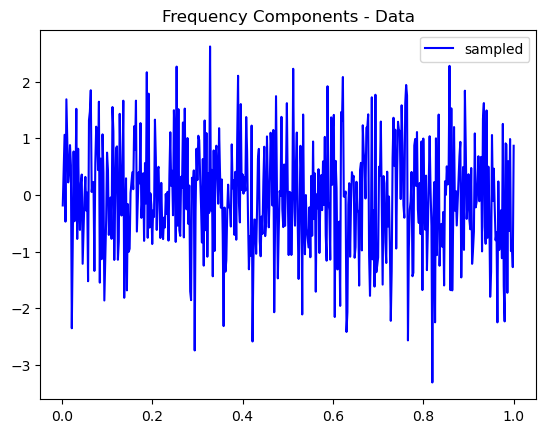

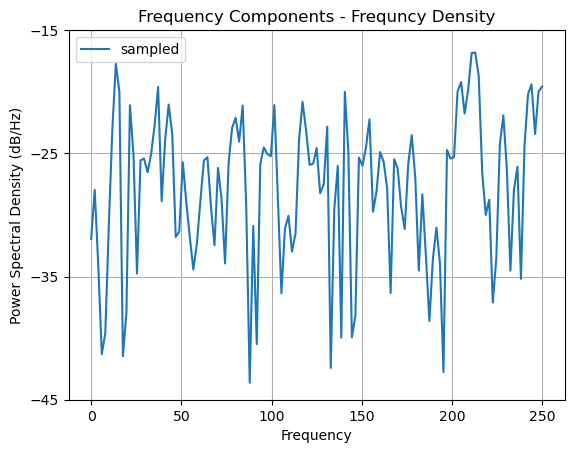

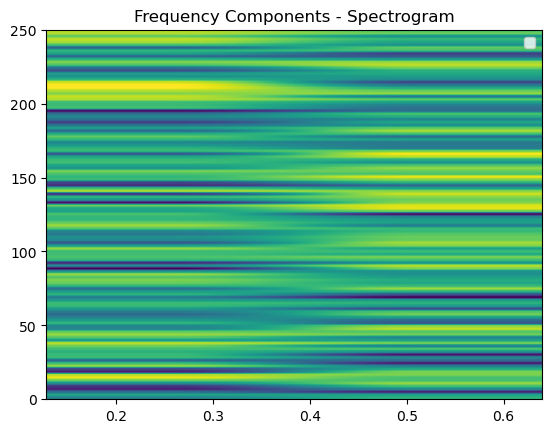

In [78]:
# 3.2.2 EEG data
data = loadmat('./02_EEG-1.mat')
data.keys()
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]

duration = 1 #sec
sample_rate = 500 # Hz

x = t
y = EEGa[0]
fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Data')
plot_sampled, = ax.plot(x, y, 'b', label="sampled")
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Frequncy Density')
ax.psd(y, Fs=sample_rate, label="sampled")
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Spectrogram')
ax.specgram(y, Fs=sample_rate, label="sampled")
ax.legend()